# 2.4. Evaluating Hyperparameters Part 1

## This script contains the following points:
### 1. Import libraries and data sets.
### 2. Split data by 2000s and transform data sets into the correct shape.
### 3. Run an random search
### 4. Create and run random forest model and print accuracy for 2000s. Plot decision trees 

## 01. Import libraries and data sets.

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [4]:
# Import the cleaned dataset
climate = pd.read_csv(os.path.join(path, '02 Data Sets', 'cleaned_climate.csv'))
climate.head(5)

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0,19600101,1,7,0.85,1.02,0.32,0.09,0.70,6.50,0.80,10.90,1,0.81,1.02,0.88,0.00,7.00,3.70,-0.90,7.90,4,0.67,1.02,0.44,0.01,2.30,2.40,-0.40,5.10,7,0.85,1.00,0.07,0.25,0.00,9.30,7.40,11.00,8,0.83,1.02,0.12,0.08,0.00,10.00,7.00,11.50,7,0.91,1.00,0.13,0.22,0.00,10.60,9.40,8.30,0.82,1.01,0.28,0.48,1.60,7.90,3.90,9.40,8,1.00,1.02,0.20,0.00,0.00,-0.60,-1.90,0.50,7,0.83,1.01,0.22,0.32,1.00,9.50,8.50,11.10,6,0.92,1.03,0.53,0.00,1.40,7.60,4.40,10.80,5,0.67,0.20,0.10,0.00,6.90,1.10,10.40,8,0.98,1.00,0.04,1.14,0.00,4.90,3.80,5.90,4,0.73,1.03,0.48,0.01,2.30,-5.90,-8.50,-3.20,5,1.01,0.05,0.32,0.00,4.20,2.20,4.90,5,0.88,1.00,0.45,0.34,4.70,8.50,6.00,10.90,8,1.03,0.98
1,1,19600102,1,6,0.84,1.02,0.36,1.05,1.10,6.10,3.30,10.10,6,0.84,1.02,0.25,0.00,0.00,2.90,2.20,4.40,4,0.67,1.02,0.18,0.31,0.00,2.30,1.40,3.10,8,0.90,1.01,0.14,0.06,0.10,7.70,6.40,8.30,8,0.89,1.02,0.18,0.66,0.50,8.20,7.40,11.00,7,0.98,1.01,0.13,0.23,0.00,6.10,3.90,10.60,0.86,1.01,0.12,0.27,0.00,7.70,6.80,9.10,6,0.94,1.02,0.56,0.13,3.20,2.10,-1.30,5.50,8,0.92,1.01,0.17,1.34,0.40,8.60,7.50,9.90,7,0.86,1.03,0.46,0.00,0.90,9.80,7.40,12.20,6,0.72,0.61,0.30,5.10,6.20,4.20,10.20,8,0.62,1.01,0.04,0.00,0.00,3.40,2.80,4.90,6,0.97,1.03,0.21,0.61,0.00,-9.50,-10.50,-8.50,5,1.01,0.05,0.06,0.00,4.00,3.00,5.00,7,0.91,1.00,0.25,0.84,0.70,8.90,5.60,12.10,6,1.03,0.62
2,2,19600103,1,8,0.90,1.02,0.

In [5]:
# Import the pleasant dataset
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(5)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 02. Split data by 2000s and transform data sets into the correct shape to feed to the deep learning model.

In [6]:
# Split the observations dataset
climate_decade = climate[climate['DATE'].astype(str).str.startswith('200')] #<-----INSERT YEAR HERE
climate_decade

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
14610,14610,20000101,1,8,0.89,1.03,0.20,0.03,0.00,2.90,1.60,3.90,7,0.88,1.03,0.24,0.00,0.00,-2.50,-3.20,-0.40,3,0.92,1.03,0.52,0.00,3.70,-4.90,-8.40,-0.70,7,0.97,1.02,0.14,0.10,0.00,6.10,3.50,8.10,8,0.92,1.02,0.12,0.22,0.00,4.20,2.50,6.90,7,0.94,1.02,0.18,0.00,0.40,7.00,4.90,10.80,0.93,1.02,0.12,0.13,0.00,3.50,1.50,5.00,6,0.83,1.03,0.57,0.00,5.20,-4.80,-9.10,-1.30,8,0.98,1.03,0.12,0.17,0.00,5.60,4.10,6.90,1,0.80,1.03,1.02,0.00,8.40,5.40,0.30,10.40,8,0.91,0.20,0.20,0.00,1.70,-0.50,2.60,7,0.94,1.01,-0.03,0.60,0.00,-5.00,-8.60,-3.20,7,0.89,1.04,0.82,1.34,0.00,-15.20,-17.00,-13.40,8,1.02,0.05,0.17,0.00,-2.30,-9.30,0.70,6,0.89,1.02,0.22,0.10,0.70,6.60,2.10,11.00,6,1.04,0.94
14611,14611,20000102,1,8,0.87,1.03,0.25,0.00,0.00,3.60,2.70,4.80,8,0.85,1.03,0.25,0.00,0.00,-1.20,-2.60,-0.30,8,0.94,1.03,0.14,0.00,0.40,-3.60,-5.00,-1.90,8,0.97,1.03,0.08,0.00,0.00,7.30,5.40,8.70,6,0.87,1.03,0.19,0.00,0.70,6.50,2.70,7.90,7,0.89,1.03,0.20,0.02,0.70,7.90,5.00,11.50,0.92,1.03,0.33,0.00,2.90,2.30,0.30,4.70,6,0.76,1.03,0.59,0.00,5.00,-0.90,-4.90,2.00,7,0.95,1.03,0.14,0.00,0.00,6.20,4.20,7.50,0,0.78,1.03,1.03,0.00,8.50,5.00,0.30,9.60,6,0.90,0.66,0.00,6.10,1.90,-0.20,5.80,6,0.94,1.01,-0.03,0.00,1.60,-0.80,-6.70,2.40,5,0.86,1.05,0.60,0.39,2.80,-13.70,-15.00,-12.30,8,1.01,0.05,0.20,0.00,1.30,0.50,2.00,8,0.92,1.02,0.13,0.42,0.00,9.60,7.30,10.60,6,1.05,

In [7]:
# Split the pleasant dataset
pleasant_decade = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] #<-----INSERT YEAR HERE
pleasant_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Define cities.

cities = [
    "Basel",
    "Belgrade",
    "Budapest",
    "Debilt",
    "Dusseldorf",
    "Heathrow",
    "Kassel",
    "Ljubljana",
    "Maastricht",
    "Madrid",
    "Munchenb",
    "Oslo",
    "Sonnblick",
    "Stockholm",
    "Valentia"
]

In [9]:
# Define weather observations.

observations = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"
]

In [10]:
# Define predictions (i.e. binary pleasant or unpleasant weather label).

predictions = {
    0: 'Pleasant weather',
    1: 'Unpleasant weather',
}

In [11]:
# Create 'X' matrices by dropping "Unnamed" "DATE" and "MONTH" columns from observations dataframe

X_200s = climate_decade.drop(columns = ['Unnamed: 0','DATE', 'MONTH'], axis=1)

In [12]:
# Create 'y' matrices by dropping "DATE" column from pleasant dataframe

y_200s = pleasant_decade.drop(['DATE'], axis=1)

In [13]:
# Check shapes of X and y sets
print(X_200s.shape)
print(y_200s.shape)

(3653, 135)
(3653, 15)


In [14]:
# Split into training and testing sets.

X_train_200s, X_test_200s, y_train_200s, y_test_200s = train_test_split(X_200s,y_200s,test_size=0.3)

In [15]:
# Check shapes of training and test sets for 1960s data

print(X_train_200s.shape, y_train_200s.shape)
print(X_test_200s.shape, y_test_200s.shape)

(2557, 135) (2557, 15)
(1096, 135) (1096, 15)


## 03. Run an random search

In [21]:
# creating a RF classifier
clf= RandomForestClassifier()

In [22]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [23]:
start = time.time()
rf_random = RandomizedSearchCV(clf, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1 = rf_random.fit(X_train_200s, y_train_200s)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 8.539866137504578 minutes


In [24]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random_1.best_params_))
print('Best RANDOM search score is: '+str(model_random_1.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 0.5158480517074048


## 04. Create and run random forest model and print accuracy for 2000s. Plot decision trees 

In [27]:
# creating a RF classifier
clf_opt_1 = RandomForestClassifier(n_estimators = 410,
                             max_depth=30,
                             max_features=6,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             criterion='entropy'
                            )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_opt_1.fit(X_train_200s, y_train_200s)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=6,
                       n_estimators=410)

In [28]:
# performing predictions on the test dataset
y_pred_1 = clf_opt_1.predict(X_test_200s)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_200s, y_pred_1))

Model Accuracy:  0.5355839416058394


#### Notes: The accuracy of the model is still quite low

### Plot forest for example

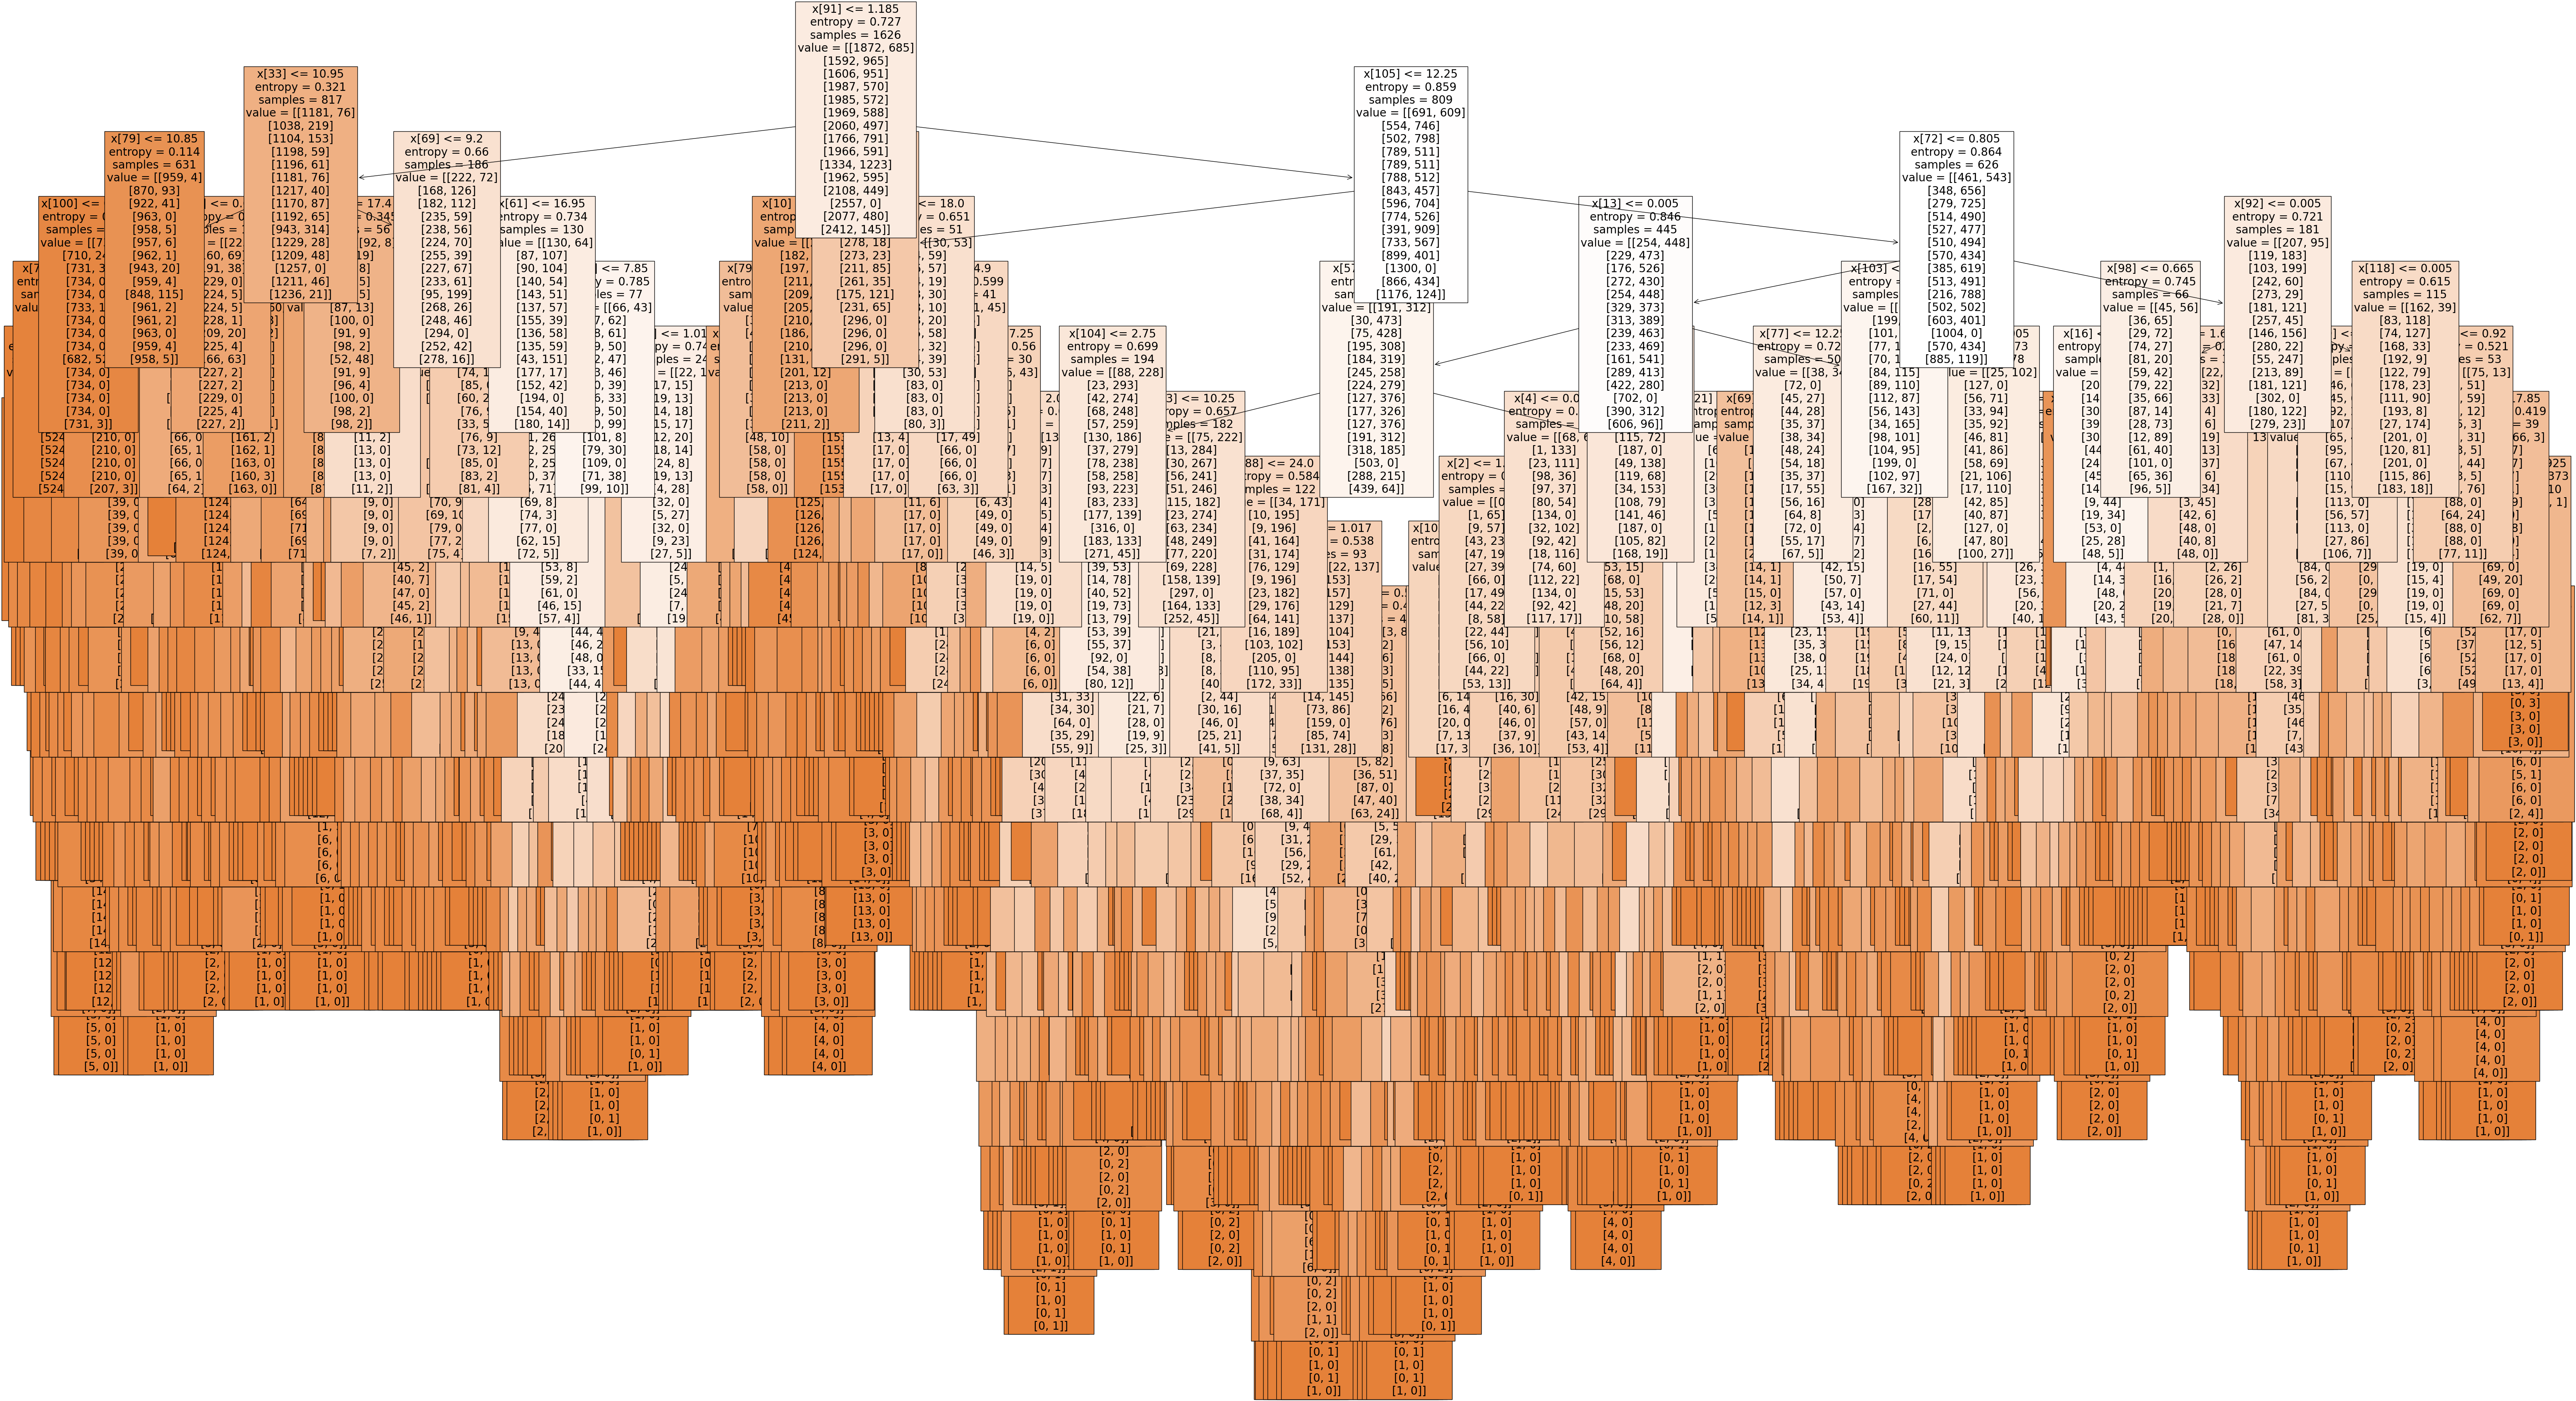

In [29]:
fig_1 = plt.figure(figsize=(80, 40))
plot_tree(clf_opt_1.estimators_[15], fontsize=20, class_names=predictions, filled=True)
plt.show()

### 5.1. Find which weather stations have the most influence

In [30]:
np.set_printoptions(threshold=np.inf)
newarray = clf_opt_1.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00258796, 0.00375427, 0.00377214, 0.00783914, 0.01140936,
       0.00733851, 0.01496753, 0.00532463, 0.02024168, 0.00347068,
       0.00425568, 0.00390889, 0.00575333, 0.01160679, 0.00469773,
       0.01136381, 0.00550351, 0.01308899, 0.00319764, 0.00398862,
       0.00383333, 0.00528859, 0.00754471, 0.00521735, 0.01846   ,
       0.0083871 , 0.01615645, 0.00486799, 0.00322716, 0.00539068,
       0.0065796 , 0.00991222, 0.00631149, 0.01412505, 0.00430997,
       0.01978688, 0.00538662, 0.00400492, 0.00503083, 0.00480105,
       0.01309182, 0.00795944, 0.01474193, 0.0048298 , 0.02608141,
       0.00224485, 0.00388381, 0.00476803, 0.00503729, 0.00814038,
       0.00417477, 0.01286973, 0.00570156, 0.01724728, 0.00375113,
       0.00510119, 0.00599039, 0.01076794, 0.00540593, 0.01633807,
       0.00802533, 0.01947112, 0.00355064, 0.00405945, 0.00366019,
       0.00587183, 0.01182199, 0.00537225, 0.01035634, 0.00676292,
       0.01739788, 0.00471939, 0.00412239, 0.00473728, 0.00624

In [31]:
np.set_printoptions(threshold=1000)

In [32]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00258796, 0.00375427, 0.00377214, 0.00783914, 0.01140936,
         0.00733851, 0.01496753, 0.00532463, 0.02024168],
        [0.00347068, 0.00425568, 0.00390889, 0.00575333, 0.01160679,
         0.00469773, 0.01136381, 0.00550351, 0.01308899],
        [0.00319764, 0.00398862, 0.00383333, 0.00528859, 0.00754471,
         0.00521735, 0.01846   , 0.0083871 , 0.01615645],
        [0.00486799, 0.00322716, 0.00539068, 0.0065796 , 0.00991222,
         0.00631149, 0.01412505, 0.00430997, 0.01978688],
        [0.00538662, 0.00400492, 0.00503083, 0.00480105, 0.01309182,
         0.00795944, 0.01474193, 0.0048298 , 0.02608141],
        [0.00224485, 0.00388381, 0.00476803, 0.00503729, 0.00814038,
         0.00417477, 0.01286973, 0.00570156, 0.01724728],
        [0.00375113, 0.00510119, 0.00599039, 0.01076794, 0.00540593,
         0.01633807, 0.00802533, 0.01947112, 0.00355064],
        [0.00405945, 0.00366019, 0.00587183, 0.01182199, 0.00537225,
         0.01035634, 0.00676292, 0.0173978

In [33]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07723522, 0.06364941, 0.07207378, 0.07451104, 0.08592783,
       0.0640677 , 0.07840175, 0.07002224, 0.08349334, 0.06058191,
       0.07922374, 0.05952019, 0.03905285, 0.05430324, 0.03793575])

In [34]:
important = pd.Series(sumarray, index = cities).sort_values(ascending = False)
important

Dusseldorf   0.09
Maastricht   0.08
Munchenb     0.08
Kassel       0.08
Basel        0.08
Debilt       0.07
Budapest     0.07
Ljubljana    0.07
Heathrow     0.06
Belgrade     0.06
Madrid       0.06
Oslo         0.06
Stockholm    0.05
Sonnblick    0.04
Valentia     0.04
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


Text(0.5, 1.0, 'Locations Importances')

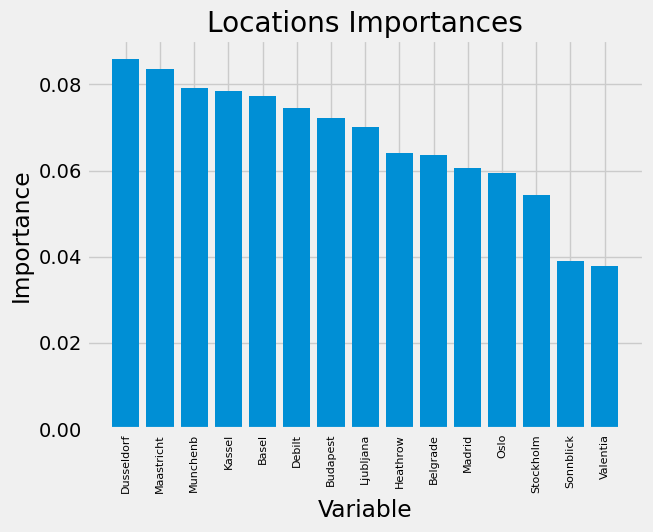

In [37]:
# Conduct variable importances by most influential weather station (broad analysis)
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation = 'vertical', fontsize = 8)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Locations Importances')

#### Notes: As shown in the graph, Dusseldorf, Maastricht and Munchenb are the top 3 stations have the most influence on how the random forest divides up data.